In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
#Descarga de pesos
base_model=MobileNet(weights='imagenet',include_top=False)

#Coniguración de red extendida:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(30,activation='softmax')(x)

/home/alfredo/anaconda3/envs/my_env/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [9]:
model=Model(inputs=base_model.input,outputs=preds)

In [10]:
#Apagar capas no entrenables
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [11]:
#Cargar de imágenes:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator=train_datagen.flow_from_directory('./comida/', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 3848 images belonging to 30 classes.


In [12]:
print(train_generator)

In [28]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
#Entrenamiento del modelo:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=100)

PIL image size (224, 224)


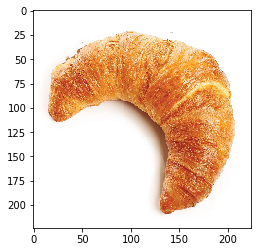

In [50]:
filename = 'cuernito.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

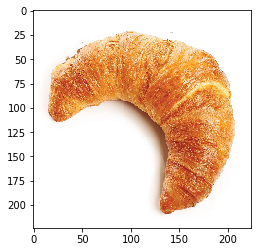

numpy array size (224, 224, 3)


In [51]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


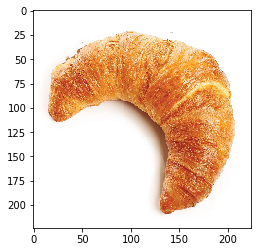

In [52]:
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


In [53]:
predictions = model.predict(image_batch)
print(predictions)

[[1.0542604e-03 4.8943716e-03 7.7881403e-03 8.2103460e-04 5.5133910e-03
  6.9226921e-03 1.3708264e-03 7.8224030e-04 4.6054637e-03 1.6931560e-02
  1.2121158e-02 6.4473349e-01 5.3820582e-03 3.0882771e-03 1.0081423e-03
  3.9014265e-02 5.6727044e-04 1.1188081e-03 1.2246866e-01 7.8630466e-03
  4.6552941e-02 1.3289711e-02 6.5364609e-03 3.1076951e-03 7.2642933e-03
  8.3492612e-03 3.6385567e-03 9.6537557e-04 2.2653900e-03 1.9981151e-02]]
